# Classification of Molecules based on their BBB Penetrability using Decision Tree Algorithm

### Installing RDKit ( Reaction Discovery Toolkit)

In [1]:
!pip install rdkit 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
dataset = pd.read_csv(r"D:\1-1 sem\Data Structures\dataset.csv")

In [3]:
dataset

,NAME,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,logBB
0,CN(C)Cc1ccc(-c2cccc(NC3N=CC=C3[N+](=O)[O-])c2)o1,24.238095,6.376657,3.380952,8.809524,163.936569,95.796843,1.480570,6.431660,7.856734,...,7.134854,4.123094,4.645592,5.188433,5.540037,5.813944,6.195298,6.528323,6.876329,-0.27
1,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,34.142857,6.789600,3.761905,10.962963,160.730762,135.796354,1.735495,6.847519,8.240399,...,7.494534,4.412798,4.914491,5.428797,5.947872,6.122630,6.466291,6.713753,7.126640,-2.69
2,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,33.321429,7.045589,3.821429,11.722222,165.679856,132.398850,1.538020,7.061757,8.487477,...,6.751394,4.485823,4.981035,5.453985,5.730303,5.869473,6.193001,6.334056,6.470606,-2.52
3,Oc1c(I)cc(Cl)c2cccnc12,196.666667,6.389883,4.055556,9.257174,152.212060,1062.059359,3.475070,6.714383,8.044624,...,5.811667,3.725693,4.397531,5.022234,5.602119,5.806922,6.037050,6.274129,6.565358,-2.40
4,CCNC(=NCCSCc1ncccc1Br)NC#N,62.114286,6.086449,2.800000,6.157476,165.237448,289.739987,1.838374,6.202743,7.659874,...,4.779386,3.624341,3.984344,4.367864,4.659303,4.359909,4.229112,4.339331,4.515314,-2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Nc1c(Cl)cc(C2=NCCn3nc4cc(C(F)(F)F)ccc4c32)cc1Cl,44.324324,7.125335,4.297297,12.032699,169.771330,184.991187,1.826421,7.249765,8.514856,...,8.285724,4.378897,5.036141,5.691415,6.293535,6.729955,7.222401,7.667646,7.931039,-0.40
996,CCOC(=O)C1=CCCC[C@H]1S(=O)(=O)Nc1ccc(F)cc1Cl,37.200000,6.630685,3.325000,8.801235,164.440096,151.169710,1.666185,6.721897,8.193740,...,5.557552,4.051785,4.421848,4.874243,5.264954,5.166214,5.345469,5.394905,5.534747,-0.20
997,CCC(=O)Nc1cc(O)nc2ncnn12,27.916667,6.882688,3.541667,11.000000,171.071525,110.673908,1.402047,6.893967,8.270913,...,5.645157,3.766997,4.364690,5.010219,5.469904,5.813244,6.045912,6.343791,5.837833,-0.30
998,N#Cc1ccc2c(c1)CCN(CCC1CCC(NC(=O)/C=C/c3cccc4cc...,19.913043,5.826226,3.159420,5.710145,161.180325,78.307565,1.511117,5.919348,7.373935,...,7.000911,4.474492,5.045842,5.574765,6.046337,6.314595,6.612723,6.833861,6.845244,-0.20


In [4]:
dataset.head(20)

,NAME,AATS0Z,AATS0are,AATS0d,AATS0dv,AATS0i,AATS0m,AATS0p,AATS0pe,AATS0se,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,logBB
0,CN(C)Cc1ccc(-c2cccc(NC3N=CC=C3[N+](=O)[O-])c2)o1,24.238095,6.376657,3.380952,8.809524,163.936569,95.796843,1.480570,6.431660,7.856734,...,7.134854,4.123094,4.645592,5.188433,5.540037,5.813944,6.195298,6.528323,6.876329,-0.27
1,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,34.142857,6.789600,3.761905,10.962963,160.730762,135.796354,1.735495,6.847519,8.240399,...,7.494534,4.412798,4.914491,5.428797,5.947872,6.122630,6.466291,6.713753,7.126640,-2.69
2,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,33.321429,7.045589,3.821429,11.722222,165.679856,132.398850,1.538020,7.061757,8.487477,...,6.751394,4.485823,4.981035,5.453985,5.730303,5.869473,6.193001,6.334056,6.470606,-2.52
3,Oc1c(I)cc(Cl)c2cccnc12,196.666667,6.389883,4.055556,9.257174,152.212060,1062.059359,3.475070,6.714383,8.044624,...,5.811667,3.725693,4.397531,5.022234,5.602119,5.806922,6.037050,6.274129,6.565358,-2.40
4,CCNC(=NCCSCc1ncccc1Br)NC#N,62.114286,6.086449,2.800000,6.157476,165.237448,289.739987,1.838374,6.202743,7.659874,...,4.779386,3.624341,3.984344,4.367864,4.659303,4.359909,4.229112,4.339331,4.515314,-2.15
5,CS(=O)(=O)N(CCO)c1c(Cl)c(Cl)cc2[nH]c(=O)c(=O)[...,51.757576,7.075336,3.848485,10.838010,164.650223,212.356327,1.828166,7.220845,8.700223,...,7.284530,4.269697,4.816241,5.439708,6.144856,6.578817,6.956069,7.329073,7.472294,-2.15
6,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](OC2O[C@H]...,24.666667,6.568415,3.750000,8.666667,163.155807,97.423609,1.385801,6.599692,8.086625,...,7.772595,4.350278,4.888468,5.428797,5.973332,6.336383,6.740999,7.146452,7.481186,-2.09
7,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1,35.217391,7.738678,4.000000,16.086957,169.394671,140.210154,1.436300,7.704104,9.052175,...,5.811141,3.743604,4.172462,4.640175,4.809131,5.075174,5.134327,5.473321,5.779199,-2.09
8,O=c1[nH]c2cc(Cl)ccc2c(O)c1-c1cccc(Oc2ccccc2)c1,32.500000,6.329845,3.850000,9.140123,154.682049,131.614350,1.817087,6.476013,7.868544,...,8.318097,4.436752,5.075174,5.745004,6.366578,6.726983,7.130023,7.669699,8.013794,-2.03
9,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@@H]1NCOC,19.217391,6.112822,2.565217,5.521739,168.418809,75.269119,1.208638,6.145491,7.696901,...,3.044522,3.465736,3.761200,3.988984,4.317488,4.442651,4.477337,4.189655,3.828641,-1.96


## Data Preprocessing

In [5]:
df=dataset[['NAME','logBB']]

In [6]:
df.shape

(1000, 2)

In [7]:
df['logBB'].value_counts()

-0.10    22
 0.00    18
-0.20    17
-1.00    16
 0.20    16
         ..
 0.93     1
-1.81     1
 0.91     1
-1.72     1
 0.46     1
Name: logBB, Length: 257, dtype: int64

In [9]:
df.to_csv(r'C:\Users\anant\Desktop\dataset_da\data')


In [8]:
df['logBB'] = df['logBB'].apply(lambda x: 1 if x > 0 else 0)
print(df)

                                                  NAME  logBB
0     CN(C)Cc1ccc(-c2cccc(NC3N=CC=C3[N+](=O)[O-])c2)o1      0
1     O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O      0
2    COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...      0
3                               Oc1c(I)cc(Cl)c2cccnc12      0
4                           CCNC(=NCCSCc1ncccc1Br)NC#N      0
..                                                 ...    ...
995    Nc1c(Cl)cc(C2=NCCn3nc4cc(C(F)(F)F)ccc4c32)cc1Cl      0
996       CCOC(=O)C1=CCCC[C@H]1S(=O)(=O)Nc1ccc(F)cc1Cl      0
997                           CCC(=O)Nc1cc(O)nc2ncnn12      0
998  N#Cc1ccc2c(c1)CCN(CCC1CCC(NC(=O)/C=C/c3cccc4cc...      0
999  CCCc1nnnn1-c1ccc(OC)c(CN[C@H]2CCCN[C@H]2c2cccc...      0

[1000 rows x 2 columns]


In [10]:
df.head()

,NAME,logBB
0,CN(C)Cc1ccc(-c2cccc(NC3N=CC=C3[N+](=O)[O-])c2)o1,0
1,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0
2,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0
3,Oc1c(I)cc(Cl)c2cccnc12,0
4,CCNC(=NCCSCc1ncccc1Br)NC#N,0


In [11]:
df['logBB'].value_counts()

0    535
1    465
Name: logBB, dtype: int64

## RDKit used for Molecular Structure of SMILES (Simplified Molecular-Input Line-Entry System)

In [12]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df,'NAME', 'Structure')

In [13]:
df.head()

,NAME,logBB,Structure
0,CN(C)Cc1ccc(-c2cccc(NC3N=CC=C3[N+](=O)[O-])c2)o1,0,<rdkit.Chem.rdchem.Mol object at 0x000001E4582...
1,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0,<rdkit.Chem.rdchem.Mol object at 0x000001E4582...
2,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0,<rdkit.Chem.rdchem.Mol object at 0x000001E4582...
3,Oc1c(I)cc(Cl)c2cccnc12,0,<rdkit.Chem.rdchem.Mol object at 0x000001E4582...
4,CCNC(=NCCSCc1ncccc1Br)NC#N,0,<rdkit.Chem.rdchem.Mol object at 0x000001E4582...


In [14]:
df.columns

Index(['NAME', 'logBB', 'Structure'], dtype='object')

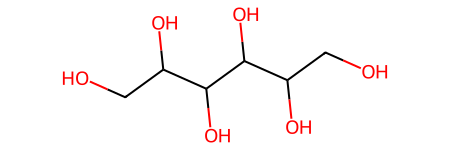

In [15]:
df.Structure[18]

## Generating MACCS (Molecular ACCess System) keys

In [16]:
from rdkit.Chem import MACCSkeys
Mkeys = MACCSkeys.GenMACCSKeys(df.Structure[18])
print(np.array(Mkeys))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0]


In [17]:
len(Mkeys)

167

In [18]:
print("Index of On bits:",tuple(Mkeys.GetOnBits()))

Index of On bits: (53, 54, 72, 82, 89, 90, 91, 104, 109, 131, 132, 138, 139, 140, 146, 152, 153, 155, 157, 159, 164)


In [19]:
print("Number of On bits: ",len(Mkeys.GetOnBits()))

Number of On bits:  21


In [20]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys
def generate_maccs_keys(df):
    maccs_keys = []
    for smiles in df['NAME']:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            maccs = MACCSkeys.GenMACCSKeys(mol)
            maccs_keys.append(maccs)
        else:
            maccs_keys.append(None)
    return np.array(maccs_keys)

In [21]:
maccs_keys = generate_maccs_keys(df)
print(maccs_keys.shape)

(1000, 167)


In [22]:
maacs=pd.DataFrame(maccs_keys)

In [23]:
maacs['logBB']=df['logBB']
maacs.shape

(1000, 168)

In [24]:
maacs.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,logBB
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,1,0,0


In [36]:
maacs[0].value_counts()

0    1000
Name: 0, dtype: int64

In [25]:
x = maacs.drop('logBB', axis=1).values  
y = maacs['logBB'].values  

## Splitting the Dataset to Training and Testing of the ratio 80%, 20% respectively

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying Decesion Tree Algorithm

In [27]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [28]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [29]:
decision_tree = DecisionTree(max_depth=10)  

In [30]:
decision_tree.fit(x_train, y_train)

In [31]:
y_pred = decision_tree.predict(x_test)

# Accuracy of Model 

In [32]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree Classifier: 73.00%
